# Validation : Harden tibia shaft (2021)
#### Model validation information
- Performed by : Ali Riazi
- Reviewed by : Johan Iraeus and Bengt Pipkorn

Added to SAFER HBM Validation Catalog on : 2024-02-09

Recent update : 2024-02-09

#### Summary: 
- The simulation of the 4-point bending test is conducted on an isolated tibia shaft, following the experimental approach of Harden et al., 2021 

Ref: 
Harden A.L., Kang Y.-S., Hunter R.L., Bendig A., Bolte J.H., IV, Eckstein N.I., Smith A.G.F., Agnew A.M. Preliminary Sex-specific Relationships between Peak Force and Cortical Bone Morphometrics in Human Tibiae Subjected to Lateral Loading (2022) Proceedings of Science, 395, pp. 232 - 248


![](Harden_tibia_v11_jupternotebook_.png)


## Experiment description
## Information on the specimens
- 5 female with average age of 89 years and 5 male with average age of 70 years isolated tibia shaft.
#### Impact and Positioning
- The isolated tibia was placed in a lateral-medial position between two potting cups, and the impactors, with a constant speed of 6 m/s, struck the 40% and 60% of length of tibia. Two load cells were placed under the potting cups to measure the reaction forces.

### Loading and Boundary Conditions
- The potting cups can rotate in the sagittal plane and can translate along the bone

### Responses recorded
- Reaction forces in the load cells were measured.


### SAFER HBM Version: `11.0`


# Setup and prerequisites 

In [11]:
import os
import glob
import numpy
import sys
import glob
# for data analysis
import pandas as pd
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from objective_rating_metrics.rating import ISO18571
from scipy import ndimage
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=2)


## Variable declaration

In [12]:
# Path to existing binouts

Sim_Tests = ['Lateral_Medial']
Exp_Tests = ['Harden_2021_testdata.csv'] 

figures_dir = "results/figures/"
processed_data_dir = f"data/processed/"
experiment_dir= "../experiment_data/"
binout_path_sim={}
result_output_dir={}

if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)
if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)

for test in Sim_Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


# Postprocessing with dynasaur

In [13]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [14]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_ID.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/Postprocess.def"]

## Extracting Time Series 

In [15]:
# Intialize a DataVisualizationController object, by passing the following argument 
#  -  binout files (data_source) 
#  -  list of dynasaur definition files (object_def_file, calculation_procedure_def_file)

sim_output={}
exp={}
for test in Sim_Tests:
    sim_M = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim_M.get_defined_calculation_procedures()
    print(commands)
    for command in sim_M.get_defined_calculation_procedures():
        sim_M.calculate(command)
    # export post-processed data
    sim_M.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")
    # Import processed data
    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/Postprocess.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_ID.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[READ BINOUT]	read secforc data ...
[READ BINOUT]	done reading secforc!
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[WARNING]	OBJECT used in your calculation procedure file, but not available in your binout
[{'visualization': 'MODEL_Added_Mass', 'x_label': 'time', 'y_label': 'mass'}, {'visualization': 'MODEL_Total_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Internal_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Kinetic_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Hourglass_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'TIBIA_Proximal_loadcell_secforc_z', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'TIBIA_Distal_loadcell_secforc_

## Input the expriment data

In [39]:
for test in Exp_Tests:
    exp[test] = pd.read_csv(os.path.join(experiment_dir, test),delimiter=';',header=[0,1,2])
RF_z = [sim_output[Sim_Tests[0]].TIBIA.Proximal_loadcell_secforc_z.time.values,sim_output[Sim_Tests[0]].TIBIA.Proximal_loadcell_secforc_z.force.values+sim_output[Sim_Tests[0]].TIBIA.Distal_loadcell_secforc_z.force.values]
# RF_z = [sim_output[Sim_Tests[0]].TIBIA.Contact_Force_proximal_z.time.values,sim_output[Sim_Tests[0]].TIBIA.Contact_Force_proximal_z.force.values+sim_output[Sim_Tests[0]].TIBIA.Contact_Force_distal_z.force.values]

### Plotting

Sum of the load cell's reaction forces are plotted for simulation and the experiments

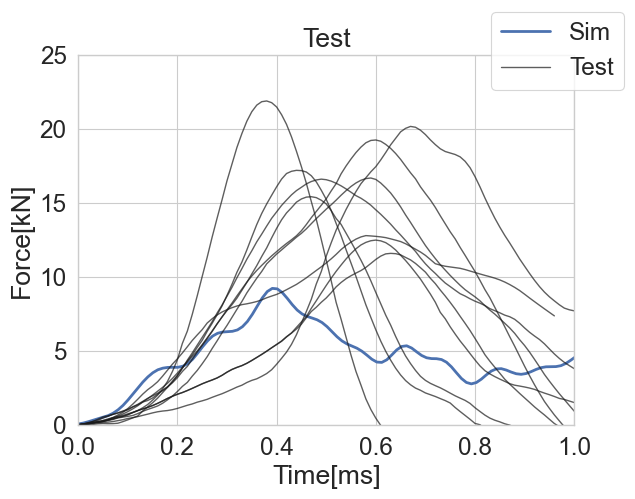

In [40]:
fig_ft = plt.figure(1)
i = 0
plt.xlim([0,1])
plt.ylim([0,25])
plt.xlabel('Time[ms]')
plt.ylabel('Force[kN]')
plt.title('Test')
indx_sim = numpy.where(abs(RF_z[1])>.2)
plt.plot(RF_z[0][(indx_sim[0][0]-2):]-RF_z[0][(indx_sim[0][0]-2)],-RF_z[1][(indx_sim[0][0]-2):],linestyle ='-', color = 'b',alpha =1,linewidth=2)

exp_force = ['Tib-001','Tib-002','Tib-003','Tib-004','Tib-005','Tib-006','Tib-007','Tib-008','Tib-009','Tib-010']
indx = {}
for test in exp_force:
    indx[test] = exp[Exp_Tests[0]][test].force.kN[exp[Exp_Tests[0]][test].force.kN - 0.02 > 0].index[0]

for test in exp_force:
    plt.plot(exp[Exp_Tests[0]][test].time.ms[(indx[test]-1):]-exp[Exp_Tests[0]][test].time.ms[(indx[test]-1)],exp[Exp_Tests[0]][test].force.kN[(indx[test]-1):],linestyle ='-', color =  'k',alpha = 0.7, linewidth=1,label='Test')
fig_ft.legend(['Sim','Test'])
fig_ft.savefig(os.path.join(figures_dir, 'Figure_v10.0_{}.jpg'.format(pd.to_datetime('today').strftime('%Y%m%d_%H%M%S'))), transparent=False, dpi=600, bbox_inches="tight")